<div align="center">
    <h1> <b>COMPETENCIA KAGGLE BÁSICO</b></h1>
    <h1> <b>NAVE ESPACIAL TITANIC</b></h1><br>
</div>
<div>
    <h3> <b>Algoritmos: Regresión Logística.</b></h3>
</div>

# 1. ENUNCIADO DEL PROBLEMA Y CASO PRÁCTICO.

<div align="center">
    <div>
    <img src="http://localhost:8888/files/Dropbox/00%20Programacion/00_portafolio/practica/03%20nave%20espacial%20titanic/anomalia.jpg?_xsrf=2%7C2b57709b%7Cc53e7d037a3517317e6e50f26270553b%7C1686317232" alt="Fashion MNIST sprite"  width="500">
    </div>
    <b>Figura 1. Anomalía Galáctica</b>
</div>

## 1.1 Entendimiento del Problema.

#### Bienvenido al año 2912, donde se necesitan tus habilidades de ciencia de datos para resolver un misterio cósmico. Hemos recibido una transmisión desde cuatro años luz de distancia y las cosas no pintan bien.

#### La nave espacial Titanic fue un transatlántico de pasajeros interestelar lanzado hace un mes. Con casi 13.000 pasajeros a bordo, la nave emprendió su viaje inaugural transportando emigrantes de nuestro sistema solar a tres exoplanetas recientemente habitables que orbitan estrellas cercanas.

#### Mientras rodeaba Alpha Centauri en ruta hacia su primer destino, el tórrido 55 Cancri E, la desprevenida nave espacial Titanic chocó con una anomalía del espacio-tiempo escondida dentro de una nube de polvo. Lamentablemente, tuvo un destino similar al de su homónimo de 1000 años antes. Aunque la nave permaneció intacta, ¡casi la mitad de los pasajeros fueron transportados a una dimensión alternativa!

#### Para ayudar a las tripulaciones de rescate y recuperar a los pasajeros perdidos, debe predecir qué pasajeros fueron transportados por la anomalía utilizando los registros recuperados del sistema informático dañado de la nave espacial.

#### ¡Ayuda a salvarlos y cambia la historia!

## 1.2 Objetivo del Estudio y Características del Cliente.

#### En esta competencia, tu tarea es predecir si un pasajero fue transportado a una dimensión alternativa durante la colisión de la nave espacial Titanic con la anomalía del espacio-tiempo. Para ayudarlo a hacer estas predicciones, se le proporciona un conjunto de registros personales recuperados del sistema informático dañado del barco.

#### 1) PassengerId- Un Id único para cada pasajero. Cada Id toma la forma gggg_ppdonde ggggindica un grupo con el que viaja el pasajero y ppes su número dentro del grupo. Las personas en un grupo a menudo son miembros de la familia, pero no siempre.
#### 2) HomePlanet- El planeta del que partió el pasajero, normalmente su planeta de residencia permanente.
#### 3) CryoSleep- Indica si el pasajero eligió ser puesto en animación suspendida durante la duración del viaje. Los pasajeros en criosueño están confinados en sus cabinas.
#### 4) Cabin- El número de cabina donde se hospeda el pasajero. Toma la forma deck/num/side, deck: cubierta; num: número y side: P de Babor o S de Estribor.
#### 5) Destination- El planeta al que desembarcará el pasajero.
#### 6) Age- La edad del pasajero.
#### 7) VIP- Si el pasajero ha pagado por servicio VIP especial durante el viaje.
#### 8) RoomService, FoodCourt, ShoppingMall, Spa, VRDeck- Monto que el pasajero ha facturado en cada uno de los muchos servicios de lujo del Spaceship Titanic .
#### 9) Name- El nombre y apellido del pasajero.
#### 10) Transported- Si el pasajero fue transportado a otra dimensión. Este es el objetivo, la columna que está tratando de predecir.

# 2. IMPORTAR LAS LIBRERÍAS Y OBTENER INFORMACIÓN GENERAL.

## 2.1 Importe de librerías.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## 2.2 Cargar y Leer el Dataset. Configuración de la vista.

In [2]:
# Leer el dataset
df = pd.read_csv("train.csv")
# A mi me gusta ver todas las columnas, así que realizaré una modificación en la configuración de pandas.
# Esta función recibe dos argumentos: el nombre de la opción y la cantidad de columnas que queremos visualizar. 
pd.set_option('display.max_columns',100) # lo mismo para las filas con max_rows
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## 2.3 Leyenda.

### 2.3.1 Obtener el nombre de cada columna.

In [3]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

### 2.3.2 Leyenda.

#### 'PassengerId': id pasajero
#### 'HomePlanet': planeta natal
#### 'CryoSleep': sueño criogénico (true / false)
#### 'Cabin': número de la cabina (letra cubierta, num y P de Babor o S de Estribor.
#### 'Destination': planeta de destino
#### 'Age': edad
#### 'VIP': si tomó o no el servicio VIP
#### 'RoomService': monto facturado en servicios a la habitación
#### 'FoodCourt': monto facturado en el patio de comida
#### 'ShoppingMall': monto facturado en centro comercial
#### 'Spa': monto facturado en SPAs
#### 'VRDeck': monto facturado en plataforma de realidad virtual
#### 'Name': nombre pasajero
#### 'Transported': si el pasajero fue o no transportado a otra dimensión

## 2.4 Primeras descripciones y conclusiones.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
# Tenemos 8693 registros, 14 columnas, 6 flotantes, 1 boleano y 7 objetos.

In [6]:
# Ver las características estadísticas de los datos
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


#### Descripción general:

#### 1.- El promedio de las edad de los pasajeros es de 29 años. El menor de ellos tiene 0 años y el mayor 79 años. El 75% de la tripulación, es menor de 38 años. Un 25% de la tripulación tiene entre 38 y 79 años. Un 25% de la tripulación tiene menos de 19 años de edad.
#### 2.- El gasto promedio de los servicios de habitación es de 224 dólares.
#### 3.- El gasto promedio en el patio de comida por pasajero es de 458 dolares. 
#### 4.- El gasto promedio de los gastos en el mall es de 174 dolares.
#### 5.- El gasto promedio en SPA por pasajero es de 311 dolares.
#### 6.- El gasto promedio de realidad virtual es de 305 dolares.
#### 7.- Al menos el 50% de la tripulación no posee gastos en ningún servicio de lujo del Spaceship Titanic. Un 25% de la tripulación ha gastado 50 dolares en promedio entre los servicios de lujo.
#### 8.- El gasto más elevado realizado por un pasajero en un servicio de lujo, fue en el patio de comidas, con un gasto de 29813 dolares.

# 3. VISUALIZACIÓN DEL DATASET.

## 3.1 Transformar entradas de texto en entradas numéricas.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
# Revisemos cuántas respuestas hay en cada columna.
df['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [9]:
df['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [10]:
df['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

### Función lambda.

In [11]:
# Ahora reemplazamos la columna 'CryoSleep', 'VIP' y 'Transported' por enteros usando la función lamda.
df['CryoSleep'] = df['CryoSleep'].apply(lambda x: 1 if x == True else 0)
df['VIP'] = df['VIP'].apply(lambda x: 1 if x == True else 0)
df['Transported'] = df['Transported'].apply(lambda x: 1 if x == True else 0)

In [12]:
# Revisamos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8693 non-null   int64  
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8693 non-null   int64  
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   int64  
dtypes: float64(6), int64(3), object(5)
memory usage: 950.9+ KB


## 3.2 Revisión e imputación de nulos.

### 3.2.1 Hallar nulos.

In [14]:
# Veamos si nos faltan datos (cantidad de datos nulos)
# Se puede revisar y contar cuántos son usando la función .isna y también se puede ordenar en forma
# ascendente.
df.isna().sum().sort_values(ascending = False)

ShoppingMall    208
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
CryoSleep         0
VIP               0
Transported       0
dtype: int64

### 3.2.2 Mapa de calor.

<AxesSubplot:>

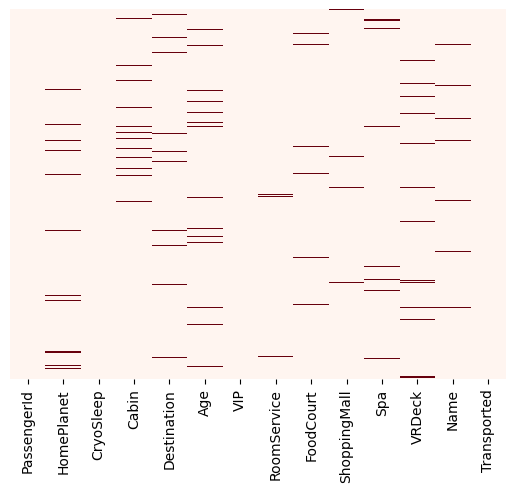

In [15]:
# No hay nulos y con esto es suficiente, pero si se quiere se puede hacer el mapa de calor:
# 1.- El dataset con la función isnull, se borran las etiquetas en el eje y.
# 2.- Se borra la barra de color que sale en la zona de leyenda
# 3.- Se agrega la paleta de colores
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Reds')

### 3.2.3 Imputación de nulos

In [16]:
# HomePlanet
df['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [17]:
df.loc[(df['HomePlanet'].isnull() == True), 'HomePlanet'] = 'Earth'

In [23]:
# ShoppingMall (entero)
df.loc[(df['ShoppingMall'].isnull() == True), 'ShoppingMall'] = df['ShoppingMall'].mean()

In [24]:
# VRDeck
df.loc[(df['VRDeck'].isnull() == True), 'VRDeck'] = df['VRDeck'].mean()

In [25]:
# FoodCourt
df.loc[(df['FoodCourt'].isnull() == True), 'FoodCourt'] = df['FoodCourt'].mean()

In [26]:
# Spa
df.loc[(df['Spa'].isnull() == True), 'Spa'] =  df['Spa'].mean()

In [27]:
# Destination
df['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [28]:
df.loc[(df['Destination'].isnull() == True), 'Destination'] = 'TRAPPIST-1e'

In [29]:
# RoomService
df.loc[(df['RoomService'].isnull() == True), 'RoomService'] = df['RoomService'].mean()

In [30]:
# Age
df.loc[(df['Age'].isnull() == True), 'Age'] = df['Age'].mean()

<AxesSubplot:>

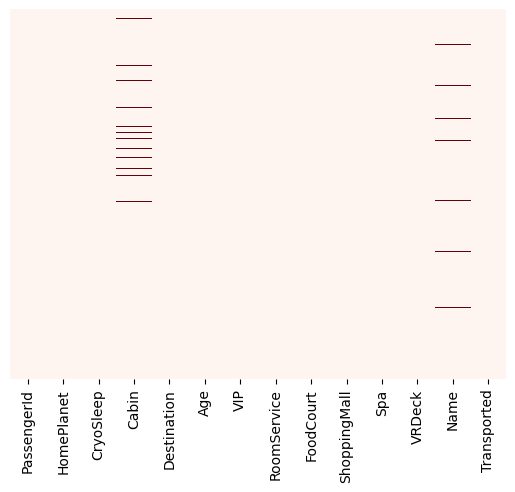

In [31]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Reds')

In [32]:
df.isna().sum().sort_values(ascending = False)

Name            200
Cabin           199
PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   int64  
 3   Cabin         8494 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   int64  
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   int64  
dtypes: float64(6), int64(3), object(5)
memory usage: 950.9+ KB


## 3.3 Datos duplicados.

In [34]:
df.duplicated().sum()

0

## 3.4 Eliminar datos inservibles.

array([[<AxesSubplot:title={'center':'CryoSleep'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'VIP'}>],
       [<AxesSubplot:title={'center':'RoomService'}>,
        <AxesSubplot:title={'center':'FoodCourt'}>,
        <AxesSubplot:title={'center':'ShoppingMall'}>],
       [<AxesSubplot:title={'center':'Spa'}>,
        <AxesSubplot:title={'center':'VRDeck'}>,
        <AxesSubplot:title={'center':'Transported'}>]], dtype=object)

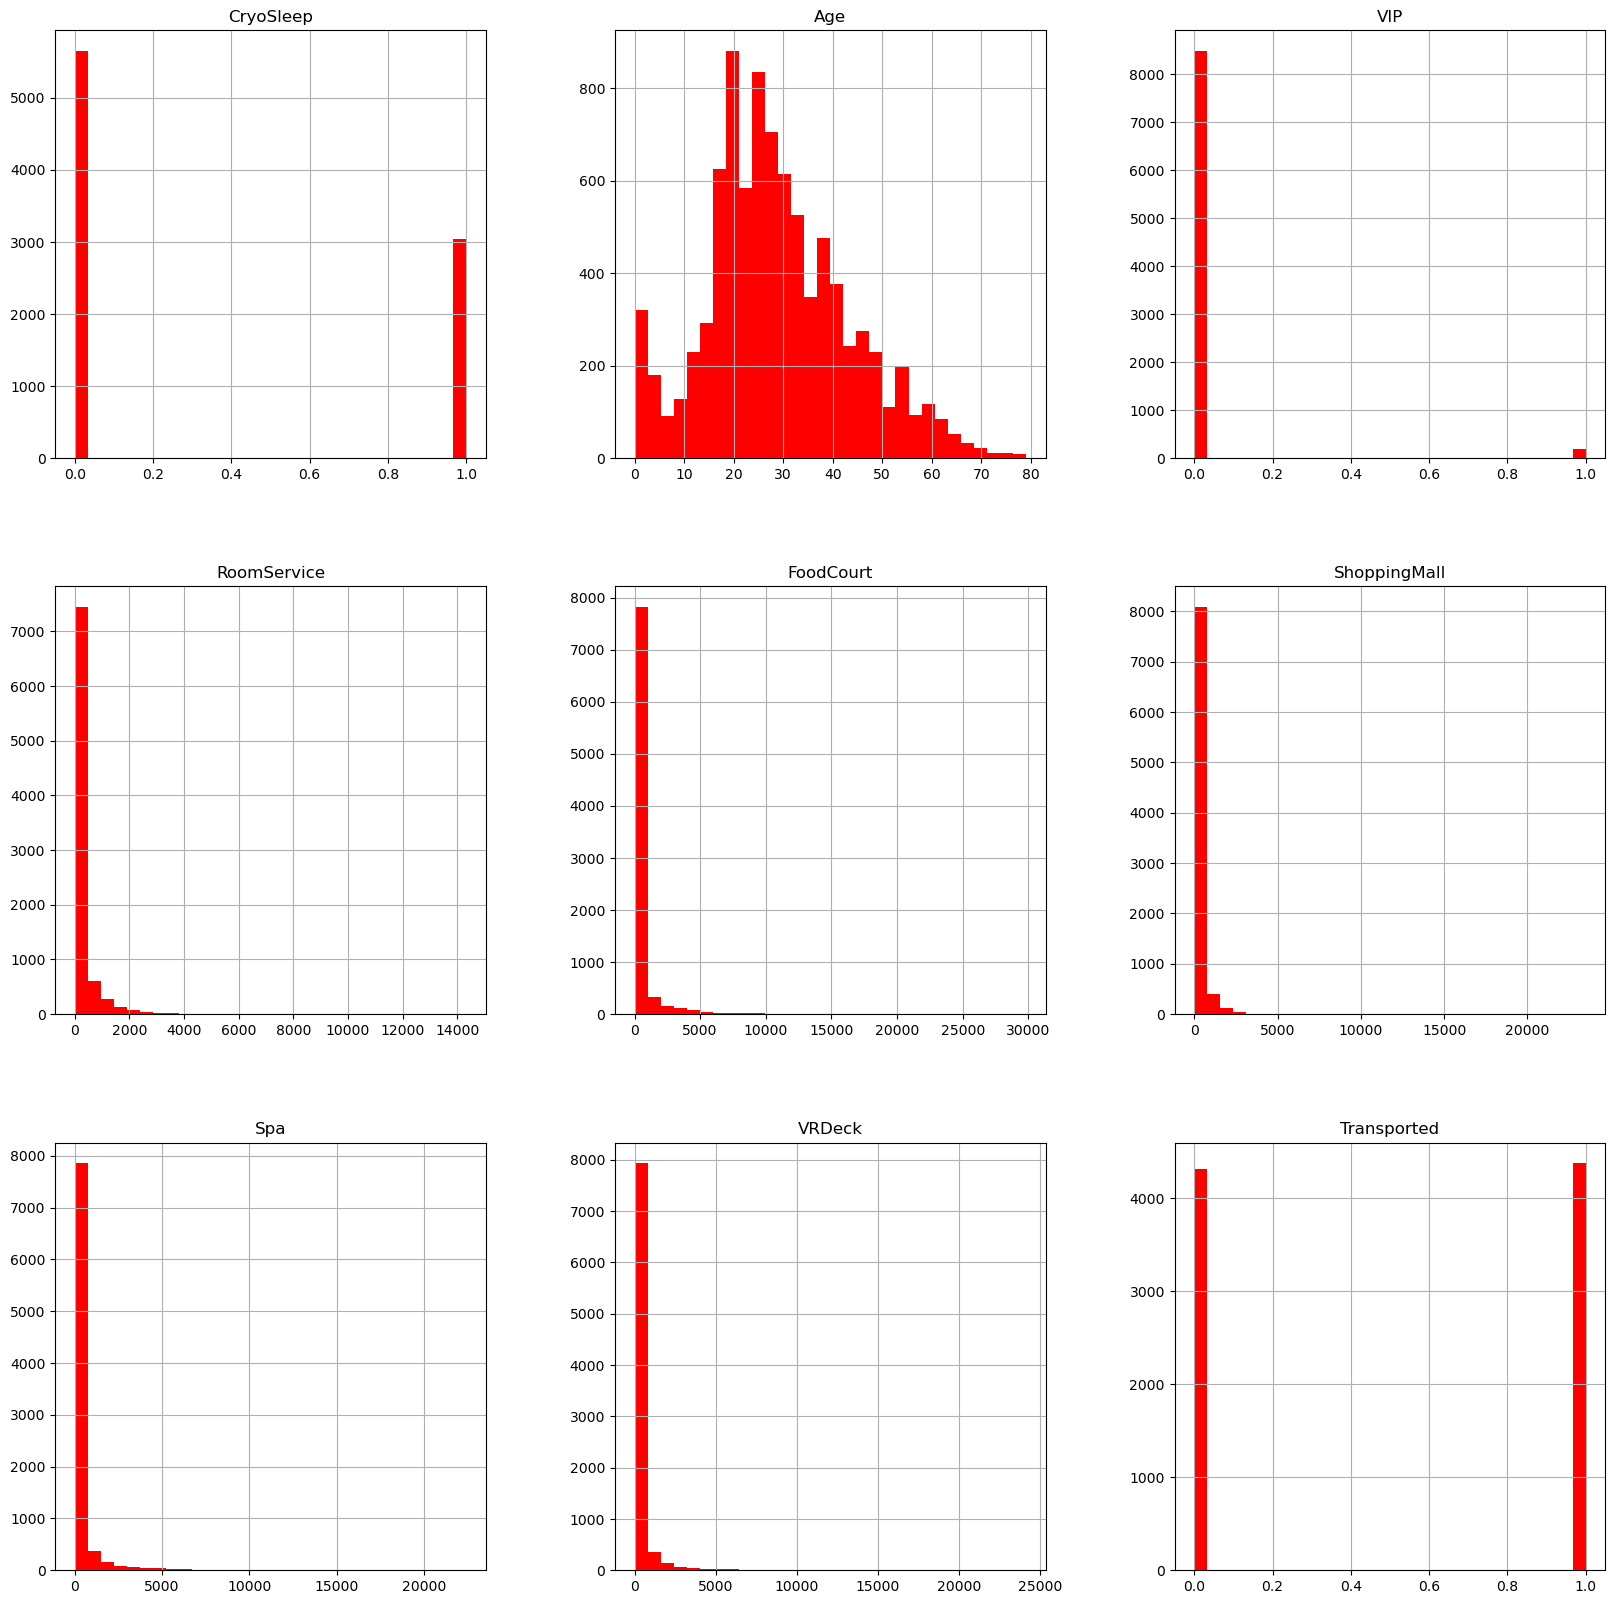

In [36]:
# Observaremos los histogramas de cada variable para decidir si eliminar alguna de ellas...
df.hist(bins = 30, figsize = (20, 20), color ='r')

#### 1.- Eliminaremos la variable PassengerID, también la variable name y cabin.

In [37]:
# Inplace hace el cambio en el propio objeto en memoria y ajusta el data frame sin crear otra variable.
df.drop(['PassengerId','Name','Cabin'], axis=1, inplace = True)

In [38]:
# Revisar
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0
8689,Earth,1,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,0
8690,Earth,0,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,1
8691,Europa,0,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0


## 3.5 Observación de las columnas (variables, atributos, etc).

In [39]:
# Cantidad de columnas
cantidad_columnas = len(df.columns)
cantidad_columnas

11

In [40]:
# Nombre de cada columna
df.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported'],
      dtype='object')

## 3.6 Gráficos.

### 3.6.1 Separar la variable Transported.

##### La variable predictora en este proyecto es 'Transported' y para comparar usando la función describe, debo separar esta variable.
##### 1.- Los que se transportan (1).
##### 2.- Los que NO se transportan (0). 

#### Pasajeros que se transportan y que NO se transportan.

In [41]:
# Contamos el número de pasajeros que se transportaron y que no se transportaron
# Estamos ante un conjunto de datos equilibrado (la misma cantidad en ambos grupos)
transported = df[df['Transported'] == 1]
no_transported = df[df['Transported'] == 0]
print("El total de pasajeros es {},"
      " los que no se transportaron son {}"
      " y los que si se transportaron son {}.".format(len(df),len(no_transported),len(transported)))

print("Por lo tanto, un {:.1f}% de los pasajeros"
      " se transportó.".format(len(transported)*100/len(df)))

El total de pasajeros es 8693, los que no se transportaron son 4315 y los que si se transportaron son 4378.
Por lo tanto, un 50.4% de los pasajeros se transportó.


### 3.6.2 Comparación entre No sobrevivientes y sobrevivientes mediante medidas de tendencia central, de dispersión y de posición.

In [42]:
no_transported.describe()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,4315.000000,4315.000000,4315.000000,4315.000000,4315.000000,4315.000000,4315.000000,4315.000000,4315.0
mean,0.128389,29.900275,0.028505,385.528247,384.084933,167.700473,558.983260,538.649578,0.0
std,0.334562,13.558108,0.166430,865.982434,1188.419888,451.527865,1535.160874,1547.074056,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,28.000000,0.000000,2.000000,0.000000,0.000000,6.000000,2.000000,0.0
75%,0.000000,38.000000,0.000000,454.000000,226.000000,128.000000,431.000000,371.500000,0.0
max,1.000000,79.000000,1.000000,14327.000000,16856.000000,10705.000000,22408.000000,24133.000000,0.0


In [43]:
transported.describe()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,4378.000000,4378.000000,4378.000000,4378.000000,4378.000000,4378.000000,4378.000000,4378.000000,4378.0
mean,0.567154,27.771017,0.017360,66.161506,531.004715,179.671111,66.860811,74.424342,1.0
std,0.495526,14.995903,0.130622,273.085258,1909.372931,712.562664,262.363560,290.475459,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,1.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,1.000000,37.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,1.0
max,1.000000,78.000000,1.000000,3992.000000,29813.000000,23492.000000,4103.000000,5063.000000,1.0


### 3.6.2 Comparación entre No sobrevivientes y sobrevivientes mediante gráficos de barra.

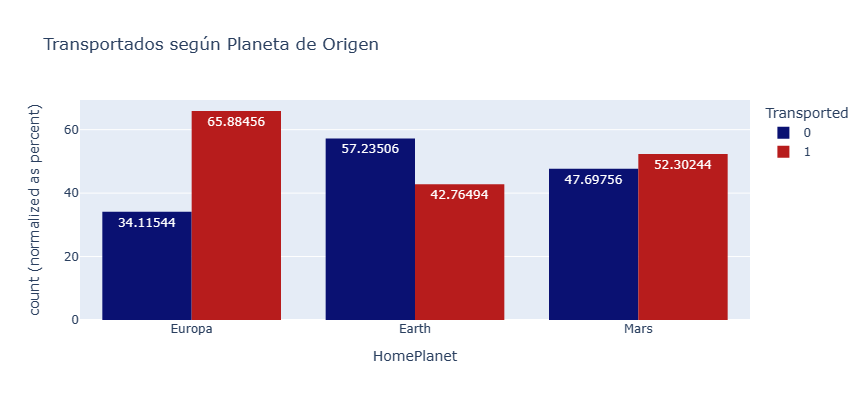

In [77]:
px.histogram(df, x='HomePlanet', color = 'Transported', text_auto=True,
             title='Transportados según Planeta de Origen', barmode='group', barnorm='percent',
             width=800, height=400, color_discrete_sequence=['#0A1172','#B71C1C'])

#### Conclusiones:
##### 1.- Se observa que el 66% de los pasajeros provinientes de europa fue transportado. Posiblemente exista una correlación. 

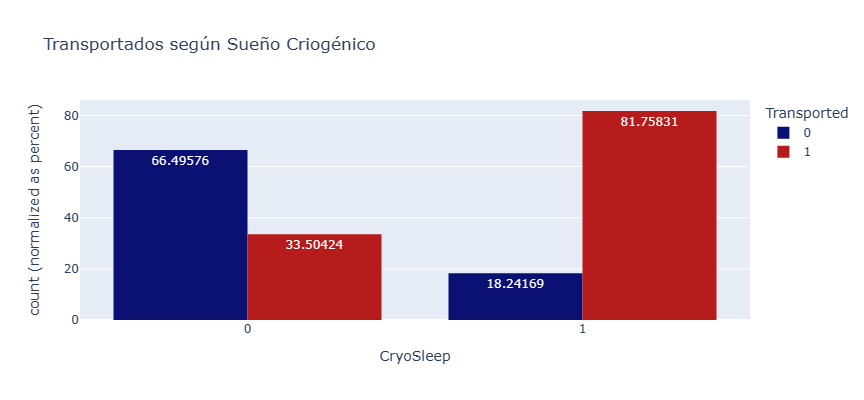

In [83]:
px.histogram(df, x='CryoSleep', color = 'Transported', text_auto=True,
             title='Transportados según Sueño Criogénico', barmode='group', barnorm='percent',
             width=800, height=400, color_discrete_sequence=['#0A1172','#B71C1C'])

#### Conclusiones:
##### 1.- El 81% de las personas que estaban dentro de sueño criogénico fueron transportados. Posiblemente exista una correlación. Además, solo el 34% de las personas que estaban despiertas, fueron transportados. 

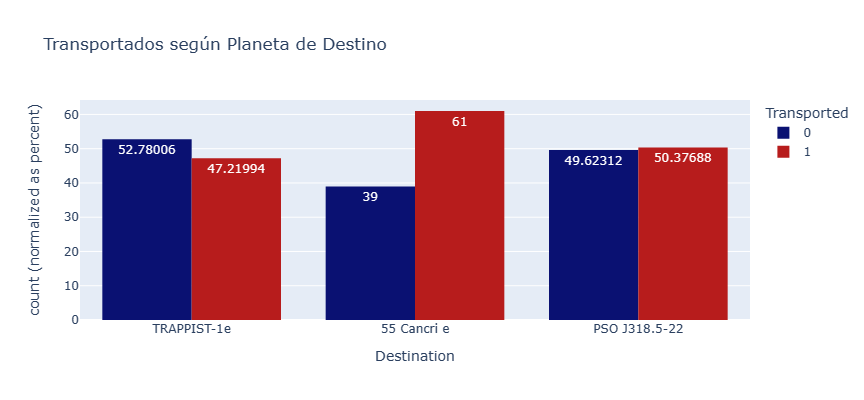

In [84]:
px.histogram(df, x='Destination', color = 'Transported', text_auto=True,
             title='Transportados según Planeta de Destino', barmode='group', barnorm='percent',
             width=800, height=400, color_discrete_sequence=['#0A1172','#B71C1C'])

#### Conclusiones:
##### 1.- Casi la mitad de los pasajeros provinientes de TRAPPIST-1e y PSO J318.5-22 fueron transportados, sin embargo, el 61% de los pasajeros de 55 Cancri e fueron transportados. Podría existir una correelación.

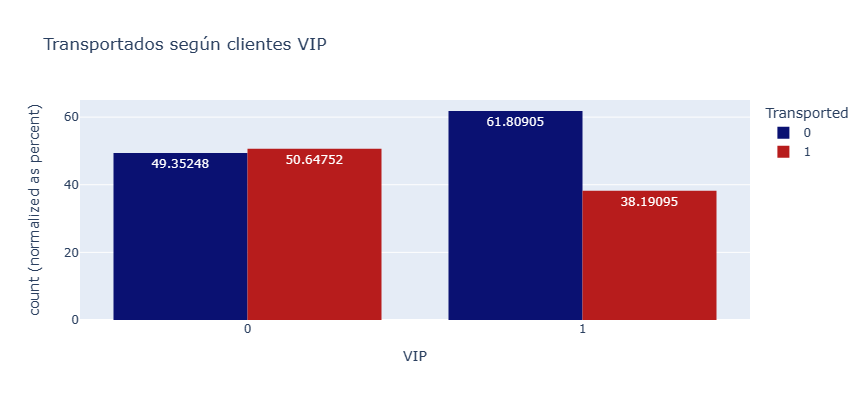

In [85]:
px.histogram(df, x='VIP', color = 'Transported', text_auto=True,
             title='Transportados según clientes VIP', barmode='group', barnorm='percent',
             width=800, height=400, color_discrete_sequence=['#0A1172','#B71C1C'])

#### Conclusiones:
##### 1.- Pasajeros VIP, un 38% de ellos fueron Transportados vs el 51% de los pasajeros comunes.

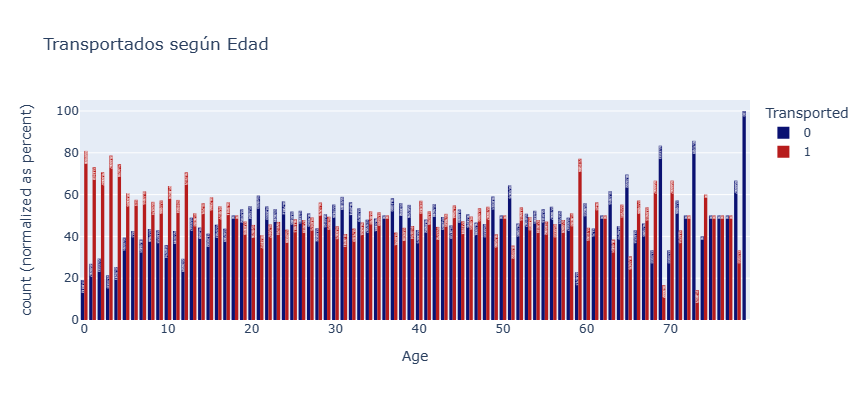

In [71]:
px.histogram(df, x='Age', color = 'Transported', text_auto=True,
             title='Transportados según Edad', barmode='group', barnorm='percent',
             width=800, height=400, color_discrete_sequence=['#0A1172','#B71C1C'])

#### Conclusiones:
##### 1.- Al menos hasta los 18 años de edad, superior al 50% las probabilidades de ser transportado. De hecho, un 81% de los menores de edad inferior a 1 año, fueron transporados.
##### 2.- A partir de los 18 años, menos del 50% de los pasajeros son transportados.
##### La edad es un factor a considerar en la correlación.

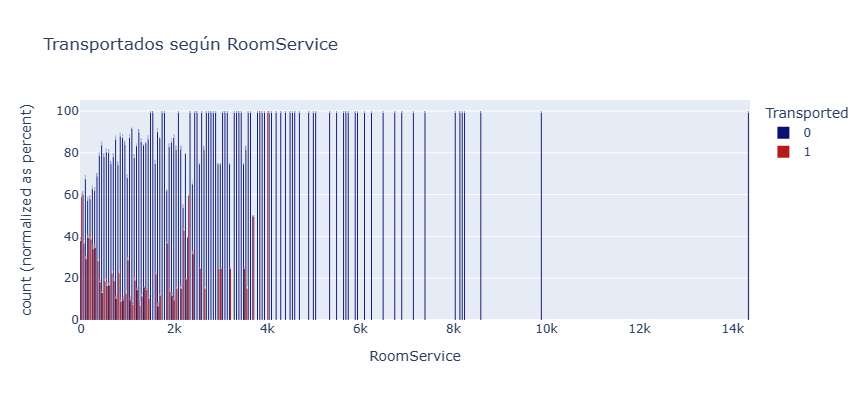

In [90]:
px.histogram(df, x='RoomService', color = 'Transported', text_auto=True,
             title='Transportados según RoomService', barmode='group', barnorm='percent',
             width=7800, height=400, color_discrete_sequence=['#0A1172','#B71C1C'])

#### Conclusiones:
##### 1.- El 61% de los pasajeros que no gastaron más de 25 dolares, fueron transportados, pero si un pasajero gastaba 25 o más dolares en servicios de habitación, el % de transportados decaía, hasta en un 100% en muchos casos. Hay una alta correlación entre el gasto en roomservice y ser transportado.

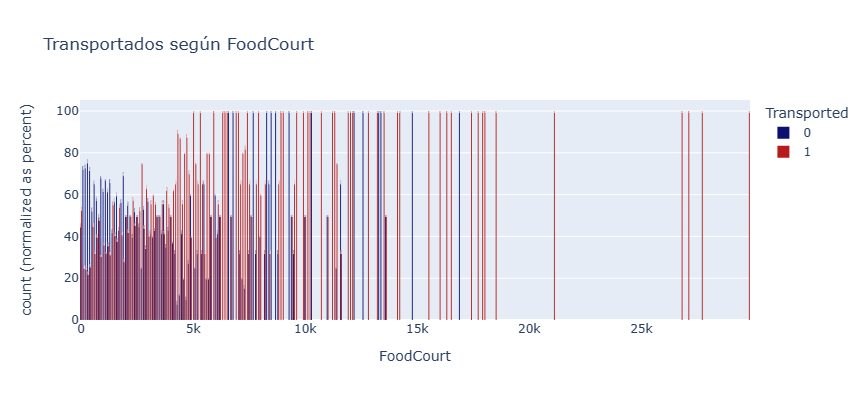

In [94]:
px.histogram(df, x='FoodCourt', color = 'Transported', text_auto=True,
             title='Transportados según FoodCourt', barmode='group', barnorm='percent',
             width=800, height=400, color_discrete_sequence=['#0A1172','#B71C1C'])

#### Conclusiones:
##### 1.- Los pasajeros que gastan menos de 2000 dolares en FoodCourt, son en menos porcentaje, transportados que los que gastan más de dos mil dolares.

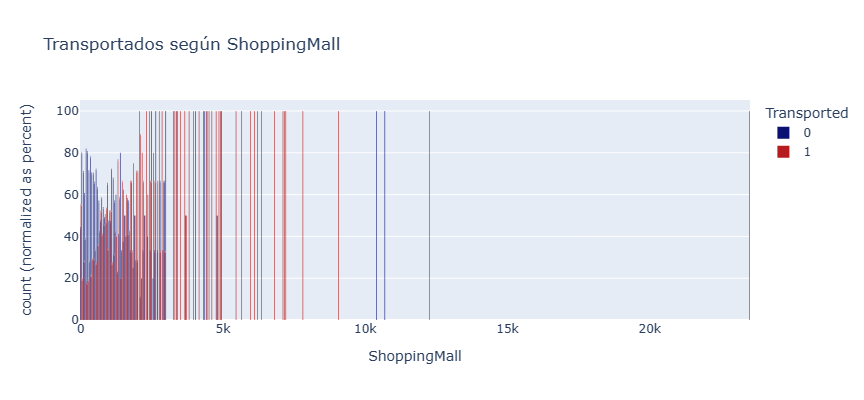

In [95]:
px.histogram(df, x='ShoppingMall', color = 'Transported', text_auto=True,
             title='Transportados según ShoppingMall', barmode='group', barnorm='percent',
             width=800, height=400, color_discrete_sequence=['#0A1172','#B71C1C'])

#### Conclusiones:
##### 1.- Al igual que en FoodCourt, los pasajeros que gastan menos de 2000 dolares en ShoppingMall, son en menos porcentaje, transportados que los que gastan más de dos mil dolares.Los que ganan más son más transportados que los que ganan menos.

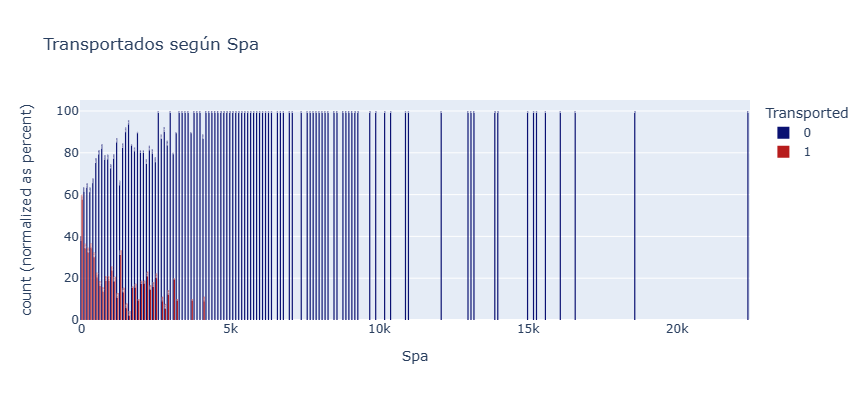

In [96]:
px.histogram(df, x='Spa', color = 'Transported', text_auto=True,
             title='Transportados según Spa', barmode='group', barnorm='percent',
             width=800, height=400, color_discrete_sequence=['#0A1172','#B71C1C'])

#### Conclusiones:
##### 1.- Si los pasajeros gastan menos de 50 dolares en servicios SPA, un 60% de ellos es transportado. Por otra parte, los pasajeros que gastan más de 50 dolares, solo un 35% de ellos son transportados.

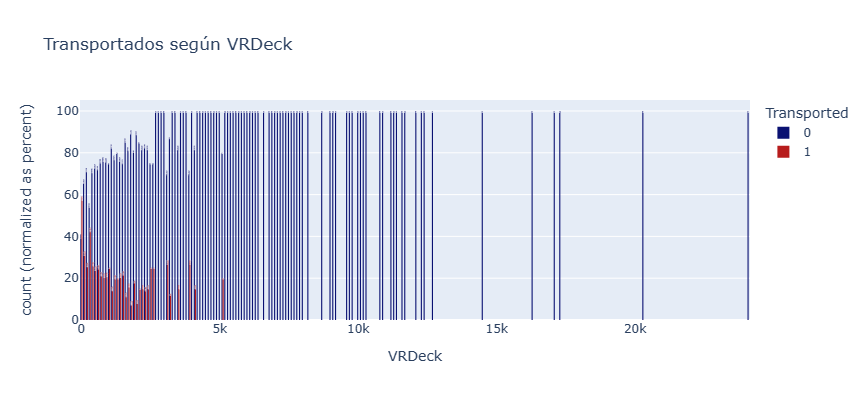

In [97]:
px.histogram(df, x='VRDeck', color = 'Transported', text_auto=True,
             title='Transportados según VRDeck', barmode='group', barnorm='percent',
             width=800, height=400, color_discrete_sequence=['#0A1172','#B71C1C'])

#### Conclusiones:
##### 1.- Nuevamente, los pasajeros más pobres son transportados con más frecuencia que los que gastan más.

## 3.7 Correlaciones.

### 3.7.1 Matriz de correlaciones.

<AxesSubplot:>

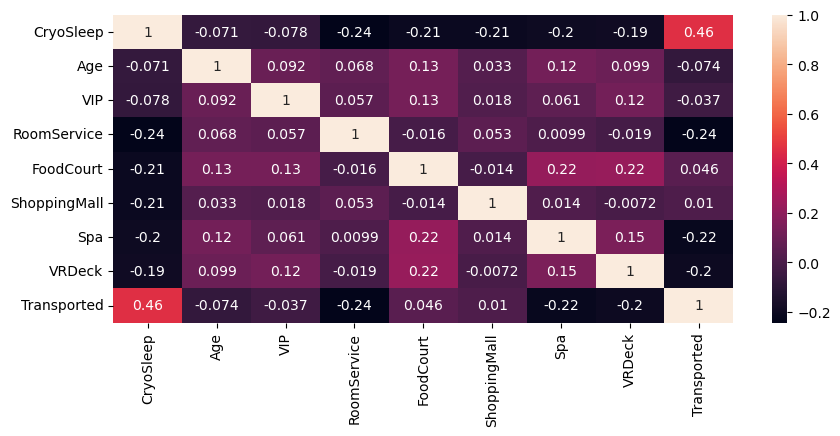

In [101]:
correlations = df.corr()
f, ax = plt.subplots(figsize = (10,4))
sns.heatmap(correlations, annot = True)

# 4. Crear los data sets para posterior entrenamiento y testing. Normalización o escalamiento de las variables.

## 4.1 Preprocesado del conjunto de variables predictoras.

### 4.1.1 Transformación de las variables categóricas a numéricas: función GETDUMMIES.

In [102]:
X_dm = pd.get_dummies(df, drop_first = True)

In [103]:
X_dm

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,1,0,0,0
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,0,0,0,1
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,1,0,0,0


### 4.1.2 Eliminación de la columna Target: "Transported".

In [104]:
X_dm.drop(['Transported'], axis=1, inplace = True)

### 4.1.3 Escalamiento de las variables.

In [105]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_sc = sc.fit_transform(X_dm)

In [106]:
X_sc

array([[0.        , 0.49367089, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.30379747, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.73417722, 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.32911392, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.40506329, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.55696203, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [107]:
y = df['Transported']
y

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

## 4.2 Separación en entrenamiento y testing.

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.2)

In [109]:
X_train.shape # Dimensiones de las observaciones de entrenamiento

(6954, 12)

In [110]:
X_test.shape # Dimensiones de las dimensiones de testing

(1739, 12)

![alt text](https://drive.google.com/uc?id=1zC0o6mkPWhlIwbs1J2LXTVv1IjtTgBLw)

![alt text](https://drive.google.com/uc?id=1JahiZRxjM1gd1cdSlJXBsSmR3cCrZEwr)

![alt text](https://drive.google.com/uc?id=1Vf81FJgCX518kr8FFS-sgzT6Nu7yjMQA)

![alt text](https://drive.google.com/uc?id=11_L_2NlgtZJulG5BI6Lj8MMGpO5F_QJV)

![alt text](https://drive.google.com/uc?id=1azYXfWAiUl1LkzEJXYN-GRZneTfzMsVV)

### 5.4.1 Matriz de confusión.

![alt text](https://drive.google.com/uc?id=1Mj1ZhIqcnJl1tfIHeq6R6T8LVzbodtqa)

### 5.4.2 Verdaderos positivos y negativos y errores del tipo I y II. 

![alt text](https://drive.google.com/uc?id=1095MBU9oYD1eE65fTrz-8sFgYbbvwAuH)

### 5.4.3 Precisión, exahustividad y F-score.

![alt text](https://drive.google.com/uc?id=1OojsDQecO-69GQFDYsULNhqgxAP9PrU3)

![alt text](https://drive.google.com/uc?id=1G1-il6xFMUuz3nd78kvwiP3mcuXqZM3U)

# 5. Entrenamiento y evaluación de un clasificador con Regresión Logística.

In [111]:
# Creamos el modelo de regresión logistica
from sklearn.linear_model import LogisticRegression # modelo de regresión

classifier = LogisticRegression() # Creamos el objeto "modelo"
classifier.fit(X_train,y_train) # Ajustamos los valores del modelo a los datos del conjunto de entrenamiento 

# Predicción
y_pred = classifier.predict(X_test)

In [112]:
# Revisamos
y_pred

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [115]:
# Probamos el resultado con los KPIs
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score # para las matrices de confusión y otras cosas

In [116]:
# Tasa de acierto
print("La tasa de acierto es de un {}%.".format(100*accuracy_score(y_test,y_pred)))

La tasa de acierto es de un 75.50316273720529%.


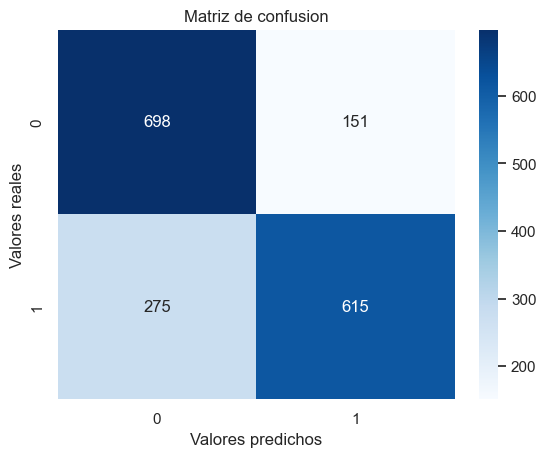

In [117]:
# Matriz de confusion (me gusto más este formato que el anterior, usaré este) 
def plot_matriz(y_test,y_pred):
  cm = confusion_matrix(y_test, y_pred)
  sns.set(font_scale=1)
  sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
  plt.title("Matriz de confusion")
  plt.xlabel("Valores predichos")
  plt.ylabel("Valores reales")
  plt.show()
# Graficar
plot_matriz(y_test,y_pred)

In [118]:
# classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77       849
           1       0.80      0.69      0.74       890

    accuracy                           0.76      1739
   macro avg       0.76      0.76      0.75      1739
weighted avg       0.76      0.76      0.75      1739



# 6. Entrenamiento y evaluación de un clasificador con Bosques Aleatorios.

In [143]:
# Vamos a obtener el modelo de ensamblamiento
from sklearn.ensemble import RandomForestClassifier

classifier2 = RandomForestClassifier(n_estimators=600, random_state=0)
classifier2.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600, random_state=0)

In [144]:
y_pred = classifier2.predict(X_test)

In [145]:
# Revisamos
y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [146]:
# Probamos el resultado con los KPIs
# Tasa de acierto
print("La tasa de acierto es de un {}%.".format(100*accuracy_score(y_test,y_pred)))

La tasa de acierto es de un 77.86083956296721%.


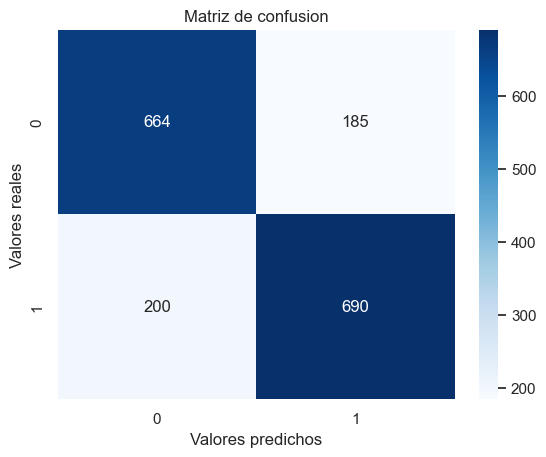

In [147]:
# Matriz de confusion
def plot_matriz(y_test,y_pred):
  cm = confusion_matrix(y_test, y_pred)
  sns.set(font_scale=1)
  sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
  plt.title("Matriz de confusion")
  plt.xlabel("Valores predichos")
  plt.ylabel("Valores reales")
  plt.show()
# Graficar
plot_matriz(y_test,y_pred)

In [148]:
# classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       849
           1       0.79      0.78      0.78       890

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



# 7. Predicción.

In [149]:
# Vamos a predecir con el csv de test
df_test = pd.read_csv("test.csv")

## Transformar entradas de texto en entradas numéricas.

In [151]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [153]:
# Revisemos cuántas respuestas hay en cada columna.
df_test['CryoSleep'].value_counts()

False    2640
True     1544
Name: CryoSleep, dtype: int64

In [154]:
df_test['VIP'].value_counts()

False    4110
True       74
Name: VIP, dtype: int64

### Función lambda.

In [157]:
# Ahora reemplazamos la columna 'CryoSleep' y 'VIP' por enteros usando la función lamda.
df_test['CryoSleep'] = df_test['CryoSleep'].apply(lambda x: 1 if x == True else 0)
df_test['VIP'] = df_test['VIP'].apply(lambda x: 1 if x == True else 0)

In [158]:
# Revisamos
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4277 non-null   int64  
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4277 non-null   int64  
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), int64(2), object(5)
memory usage: 434.5+ KB


## Revisión e imputación de nulos.

### Hallar nulos.

In [161]:
# Veamos si nos faltan datos (cantidad de datos nulos)
# Se puede revisar y contar cuántos son usando la función .isna y también se puede ordenar en forma
# ascendente.
df_test.isna().sum().sort_values(ascending = False)

FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
CryoSleep         0
VIP               0
dtype: int64

### 3.2.2 Mapa de calor.

<AxesSubplot:>

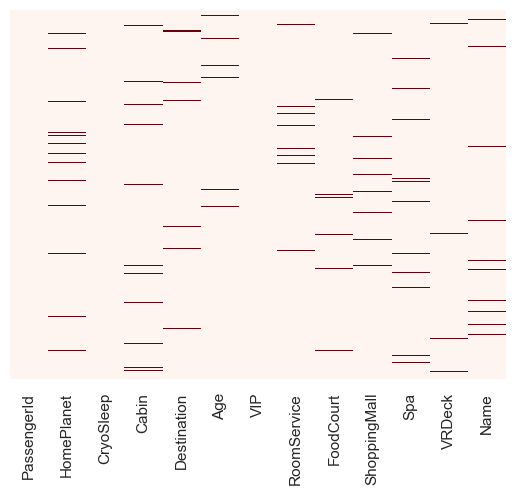

In [162]:
# No hay nulos y con esto es suficiente, pero si se quiere se puede hacer el mapa de calor:
# 1.- El dataset con la función isnull, se borran las etiquetas en el eje y.
# 2.- Se borra la barra de color que sale en la zona de leyenda
# 3.- Se agrega la paleta de colores
sns.heatmap(df_test.isnull(), yticklabels=False, cbar=False, cmap='Reds')

### Imputación de nulos

In [163]:
# HomePlanet
df_test['HomePlanet'].value_counts()

Earth     2263
Europa    1002
Mars       925
Name: HomePlanet, dtype: int64

In [164]:
df_test.loc[(df_test['HomePlanet'].isnull() == True), 'HomePlanet'] = 'Earth'

In [165]:
# ShoppingMall (entero)
df_test.loc[(df_test['ShoppingMall'].isnull() == True), 'ShoppingMall'] = df_test['ShoppingMall'].mean()

In [166]:
# VRDeck
df_test.loc[(df_test['VRDeck'].isnull() == True), 'VRDeck'] = df_test['VRDeck'].mean()

In [167]:
# FoodCourt
df_test.loc[(df_test['FoodCourt'].isnull() == True), 'FoodCourt'] = df_test['FoodCourt'].mean()

In [168]:
# Spa
df_test.loc[(df_test['Spa'].isnull() == True), 'Spa'] =  df_test['Spa'].mean()

In [169]:
# Destination
df_test['Destination'].value_counts()

TRAPPIST-1e      2956
55 Cancri e       841
PSO J318.5-22     388
Name: Destination, dtype: int64

In [170]:
df_test.loc[(df_test['Destination'].isnull() == True), 'Destination'] = 'TRAPPIST-1e'

In [171]:
# RoomService
df_test.loc[(df_test['RoomService'].isnull() == True), 'RoomService'] = df_test['RoomService'].mean()

In [172]:
# Age
df_test.loc[(df_test['Age'].isnull() == True), 'Age'] = df_test['Age'].mean()

<AxesSubplot:>

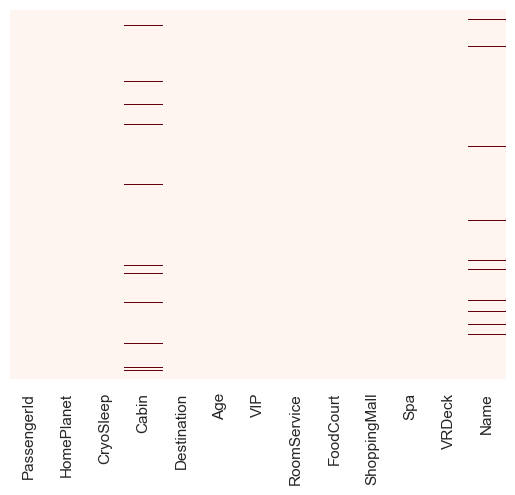

In [173]:
sns.heatmap(df_test.isnull(), yticklabels=False, cbar=False, cmap='Reds')

In [175]:
df_test.isna().sum().sort_values(ascending = False)

Cabin           100
Name             94
PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
dtype: int64

In [177]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   object 
 2   CryoSleep     4277 non-null   int64  
 3   Cabin         4177 non-null   object 
 4   Destination   4277 non-null   object 
 5   Age           4277 non-null   float64
 6   VIP           4277 non-null   int64  
 7   RoomService   4277 non-null   float64
 8   FoodCourt     4277 non-null   float64
 9   ShoppingMall  4277 non-null   float64
 10  Spa           4277 non-null   float64
 11  VRDeck        4277 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), int64(2), object(5)
memory usage: 434.5+ KB


## Eliminar datos inservibles.

#### 1.- Eliminaremos la variable PassengerID, también la variable name y cabin.

In [181]:
# Inplace hace el cambio en el propio objeto en memoria y ajusta el data frame sin crear otra variable.
df_test.drop(['PassengerId','Name','Cabin'], axis=1, inplace = True)

In [182]:
# Revisar
df_test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,1,TRAPPIST-1e,27.000000,0,0.0,0.0,0.0,0.0,0.0
1,Earth,0,TRAPPIST-1e,19.000000,0,0.0,9.0,0.0,2823.0,0.0
2,Europa,1,55 Cancri e,31.000000,0,0.0,0.0,0.0,0.0,0.0
3,Europa,0,TRAPPIST-1e,38.000000,0,0.0,6652.0,0.0,181.0,585.0
4,Earth,0,TRAPPIST-1e,20.000000,0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4272,Earth,1,TRAPPIST-1e,34.000000,0,0.0,0.0,0.0,0.0,0.0
4273,Earth,0,TRAPPIST-1e,42.000000,0,0.0,847.0,17.0,10.0,144.0
4274,Mars,1,55 Cancri e,28.658146,0,0.0,0.0,0.0,0.0,0.0
4275,Europa,0,TRAPPIST-1e,28.658146,0,0.0,2680.0,0.0,0.0,523.0


## Escalamiento de las variables

### Transformación de las variables categóricas a numéricas: función GETDUMMIES.

In [187]:
X_dm_test = pd.get_dummies(df_test, drop_first = True)

In [188]:
X_dm_test

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1,27.000000,0,0.0,0.0,0.0,0.0,0.0,0,0,0,1
1,0,19.000000,0,0.0,9.0,0.0,2823.0,0.0,0,0,0,1
2,1,31.000000,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
3,0,38.000000,0,0.0,6652.0,0.0,181.0,585.0,1,0,0,1
4,0,20.000000,0,10.0,0.0,635.0,0.0,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,34.000000,0,0.0,0.0,0.0,0.0,0.0,0,0,0,1
4273,0,42.000000,0,0.0,847.0,17.0,10.0,144.0,0,0,0,1
4274,1,28.658146,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
4275,0,28.658146,0,0.0,2680.0,0.0,0.0,523.0,1,0,0,1


### 4.1.3 Escalamiento de las variables.

In [190]:
X_sc_test = sc.fit_transform(X_dm_test)

In [191]:
X_sc_test

array([[1.        , 0.34177215, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.24050633, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.39240506, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.36276134, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.36276134, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.5443038 , 0.        , ..., 0.        , 1.        ,
        0.        ]])

## Predicción

In [194]:
y_pred_test = classifier2.predict(X_sc_test)

In [195]:
y_pred_test

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0
8689,Earth,1,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,0
8690,Earth,0,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,1
8691,Europa,0,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0


# 8. Insertar Scoring.

In [197]:
# Vamos a transformar el array de y_pred_test en un data frame
df_transported = pd.DataFrame(y_pred_test)
# y obtener la columna PassengerId desde el data frame de test
df_test = pd.read_csv("test.csv")
# crearé un df de entrega con la columna PassengerId
df_entrega = df_test[['PassengerId']]
# y le agregaré la columna Transported
df_entrega['Transported'] = df_transported.values

C:\Users\Danko\AppData\Local\Temp\ipykernel_11604\1804674117.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [198]:
df_entrega

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1
...,...,...
4272,9266_02,1
4273,9269_01,0
4274,9271_01,1
4275,9273_01,1


In [199]:
df_entrega['Transported'] = df_entrega['Transported'].apply(lambda x: True if x == 1 else False)
df_entrega

C:\Users\Danko\AppData\Local\Temp\ipykernel_11604\1575565915.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


## 8.2 Crear Csv para subir a competencia.

In [200]:
df_entrega.to_csv('submition.csv', index=False)

<div align="center">
    <h1> <b>FIN</b></h1>
</div>